# In this notebook i will perform an analysis of meteorological data.
The dataset has hourly temperature recorded for last 10 years starting from 2006–04–01 to 2016–09–09. It corresponds to Finland, a country in the Northern Europe.

I would be performing data cleaning, analysis and visualizations for making some conclusions.

In [1]:
# First of all import usefull libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Downloading data from my github file repository
data = pd.read_csv('https://github.com/gromdimon/Files/raw/main/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Checking for null values in dataframe
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
# Looking for values in Precip Type column
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [5]:
# Making new column with name Precip Types. It bases on column Precip Type, but instead of containing data in object values
# it contains values in float64 type. Also i am transforming NaNs in middle value (0.5). It would help me by my further ML :)
data['Precip Types'] =  list(map(lambda x: 0 if x == 'snow' else (1 if x == 'rain' else 0.5), data['Precip Type'].tolist()))
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Precip Types
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,1.0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,1.0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1.0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1.0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1.0


In [6]:
# Checking values in new column
data['Precip Types'].value_counts()

1.0    85224
0.0    10712
0.5      517
Name: Precip Types, dtype: int64

In [7]:
# Helpful function for missing values
def check_missing_values(dataframe):
    if dataframe.isnull().sum().sum() > 0:
        m_total = dataframe.isnull().sum().sort_values(ascending=False)
        total = m_total[m_total > 0]

        m_percent = dataframe.isnull().mean().sort_values(ascending=False)
        percent = m_percent[m_percent > 0]

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

        print(f'Total and Percentage of NaN:\n {missing_data}')
    else:
        print('No NaN found.')

In [8]:
# Checking missing values
check_missing_values(data)

Total and Percentage of NaN:
              Total  Percent
Precip Type    517  0.00536


In [9]:
datat = data.drop(columns='Precip Type')
print(datat.isnull().sum())

Formatted Date              0
Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Precip Types                0
dtype: int64


In [10]:
data.drop(columns='Precip Type', inplace=True)

In [11]:
data.dtypes

Formatted Date               object
Summary                      object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
Precip Types                float64
dtype: object

In [12]:
# Transforming Date column
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

In [13]:
data.head(3)

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Precip Types
0,2006-03-31 22:00:00+00:00,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,1.0
1,2006-03-31 23:00:00+00:00,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,1.0
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1.0


In [14]:
# Use Date as index to handle with other metrics
data = data.set_index('Formatted Date')

In [15]:
# Summarizing values in Temperature and Humidity columns to have monthly temporary intervals
columns = ['Apparent Temperature (C)', 'Humidity']
monthly_data = data[columns].resample('M').mean()
monthly_data.head(3)

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467


<function matplotlib.pyplot.show>

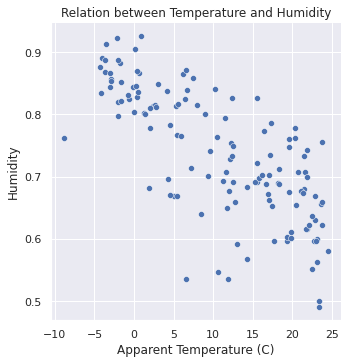

In [16]:
# Visualizing spread between Temperature and Humidity
sns.set(style='darkgrid')
sns.relplot(x='Apparent Temperature (C)', y='Humidity', data = monthly_data)
plt.title('Relation between Temperature and Humidity')
plt.show

<function matplotlib.pyplot.show>

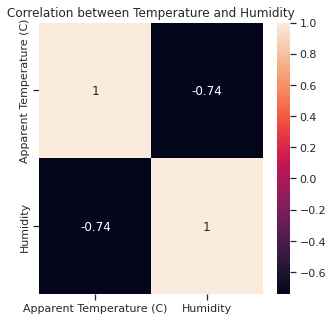

In [17]:
# Correlation between Temperature and Humidity
sns.set(style='ticks')
plt.figure(figsize=(5,5))
sns.heatmap(data=monthly_data.corr(), annot=True)
plt.title('Correlation between Temperature and Humidity')
plt.show

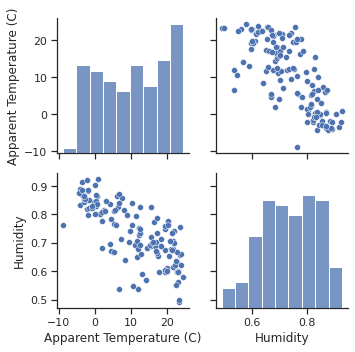

In [ ]:
# Correlation between Temperature and Humidity in squared view
sns.set(style='ticks')
sns.pairplot(monthly_data, kind = 'scatter')

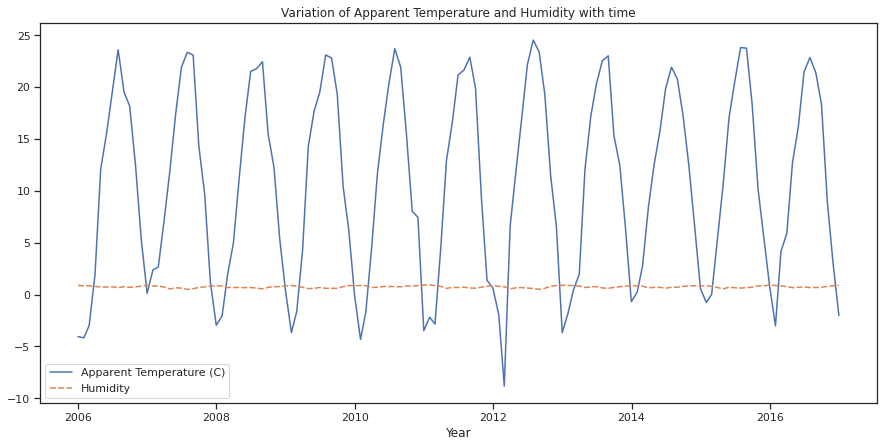

In [ ]:
# Visualizing variation of Temperature with time
plt.figure(figsize=(15,7))
sns.lineplot(data = monthly_data)
plt.xlabel('Year')
plt.title('Variation of Apparent Temperature and Humidity with time')
plt.show()

In [18]:
# Performing monthly analysis. Defining month
January=monthly_data[monthly_data.index.month==1]
February=monthly_data[monthly_data.index.month==2]
March=monthly_data[monthly_data.index.month==3]
April=monthly_data[monthly_data.index.month==4]
May=monthly_data[monthly_data.index.month==5]
June=monthly_data[monthly_data.index.month==6]
July=monthly_data[monthly_data.index.month==7]
August=monthly_data[monthly_data.index.month==8]
September=monthly_data[monthly_data.index.month==9]
October=monthly_data[monthly_data.index.month==10]
November=monthly_data[monthly_data.index.month==11]
December=monthly_data[monthly_data.index.month==12]

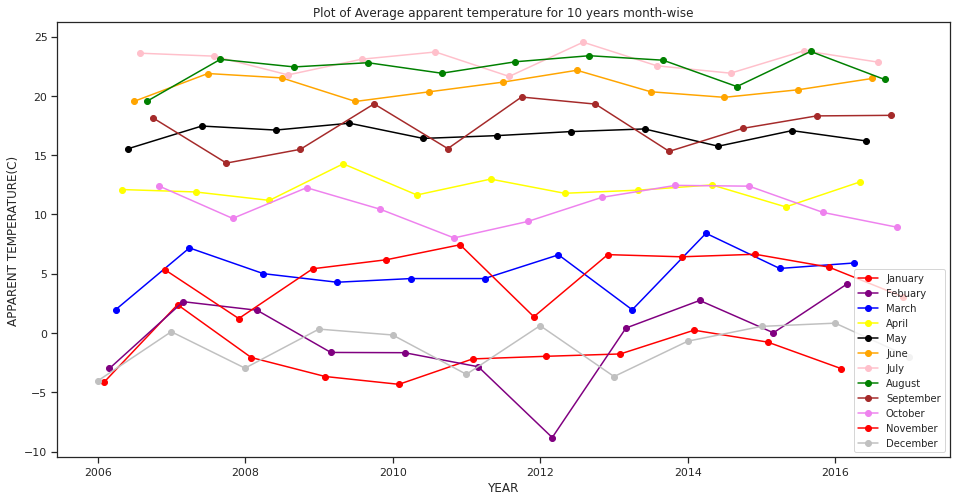

In [19]:
# Plotting apparent temperature over the 10 years period
plt.figure(figsize=(16,8))
plt.title('Plot of Average apparent temperature for 10 years month-wise')
plt.xlabel('YEAR')
plt.ylabel('APPARENT TEMPERATURE(C)')
plt.plot(January['Apparent Temperature (C)'], label = 'January', color= 'red', marker = 'o')
plt.plot(February['Apparent Temperature (C)'], label = 'Febuary', color = 'purple', marker = 'o')
plt.plot(March['Apparent Temperature (C)'], label = 'March', color = 'blue', marker = 'o')
plt.plot(April['Apparent Temperature (C)'], label = 'April', color = 'yellow', marker = 'o')
plt.plot(May['Apparent Temperature (C)'], label = 'May', color= 'black', marker = 'o')
plt.plot(June['Apparent Temperature (C)'], label = 'June', color= 'orange', marker = 'o')
plt.plot(July['Apparent Temperature (C)'], label = 'July', color = 'pink', marker = 'o')
plt.plot(August['Apparent Temperature (C)'], label = 'August', color= 'green', marker = 'o')
plt.plot(September['Apparent Temperature (C)'], label = 'September', color = 'brown', marker = 'o')
plt.plot(October['Apparent Temperature (C)'], label = 'October', color = 'violet', marker = 'o')
plt.plot(November['Apparent Temperature (C)'], label = 'November', color = 'red', marker = 'o')
plt.plot(December['Apparent Temperature (C)'], label = 'December', color = 'silver', marker = 'o')
plt.legend(loc = 0, fontsize = 10)

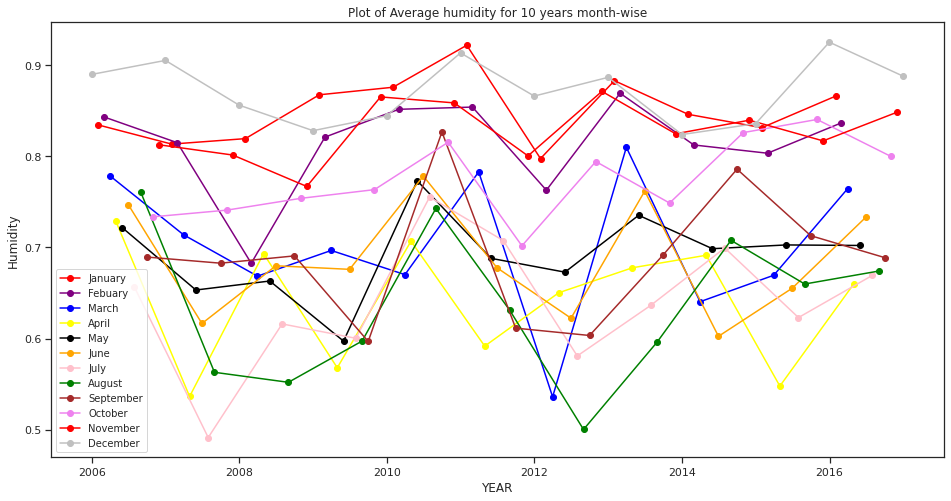

In [20]:
# Plotting humidity change over the same period
plt.figure(figsize=(16,8))
plt.title('Plot of Average humidity for 10 years month-wise')
plt.xlabel('YEAR')
plt.ylabel('Humidity')
plt.plot(January['Humidity'], label = 'January', color= 'red', marker = 'o')
plt.plot(February['Humidity'], label = 'Febuary', color = 'purple', marker = 'o')
plt.plot(March['Humidity'], label = 'March', color = 'blue', marker = 'o')
plt.plot(April['Humidity'], label = 'April', color = 'yellow', marker = 'o')
plt.plot(May['Humidity'], label = 'May', color= 'black', marker = 'o')
plt.plot(June['Humidity'], label = 'June', color= 'orange', marker = 'o')
plt.plot(July['Humidity'], label = 'July', color = 'pink', marker = 'o')
plt.plot(August['Humidity'], label = 'August', color= 'green', marker = 'o')
plt.plot(September['Humidity'], label = 'September', color = 'brown', marker = 'o')
plt.plot(October['Humidity'], label = 'October', color = 'violet', marker = 'o')
plt.plot(November['Humidity'], label = 'November', color = 'red', marker = 'o')
plt.plot(December['Humidity'], label = 'December', color = 'silver', marker = 'o')
plt.legend(loc = 0, fontsize = 10)

Plotting Apparent Temperature vs Humidity for each month

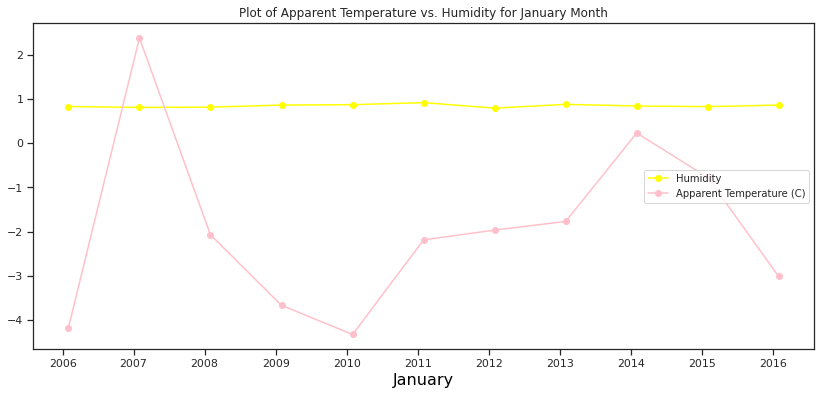

In [21]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for January Month')
plt.plot(January['Humidity'], label = 'Humidity', color = 'yellow', marker = 'o')
plt.plot(January['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'pink', marker = 'o')
plt.xlabel('January', fontsize = 16, color = 'black')
plt.legend(loc = 5, fontsize = 10)

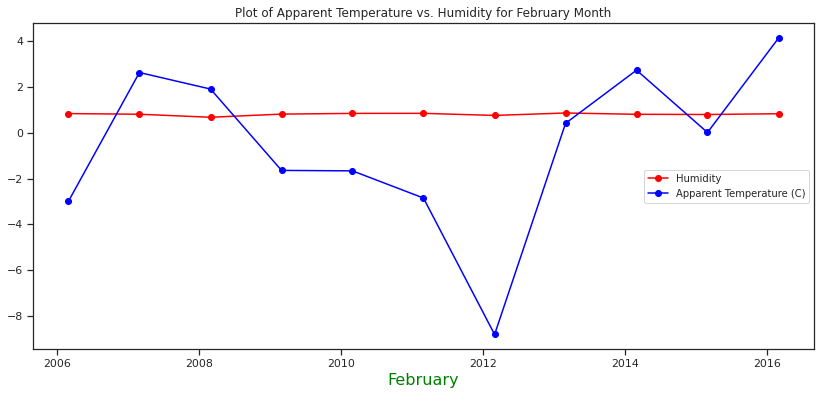

In [22]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for February Month')
plt.plot(February['Humidity'], label = 'Humidity', color = 'red', marker = 'o')
plt.plot(February['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'blue', marker = 'o')
plt.xlabel('February', fontsize = 16, color = 'green')
plt.legend(loc = 5, fontsize = 10)

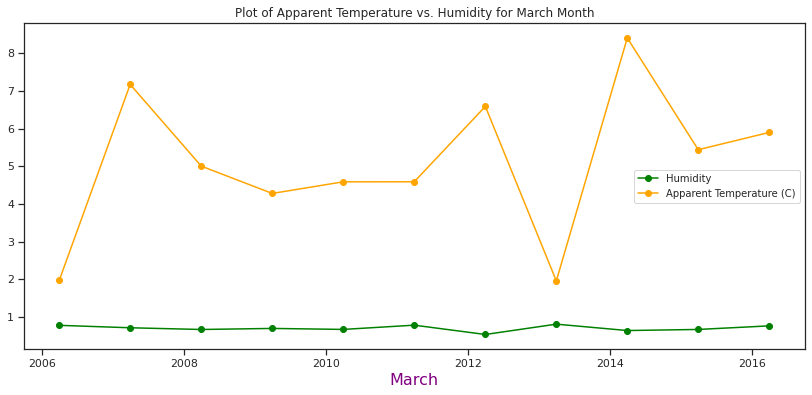

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for March Month')
plt.plot(March['Humidity'], label = 'Humidity', color = 'green', marker = 'o')
plt.plot(March['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'orange', marker = 'o')
plt.xlabel('March', fontsize = 16, color = 'purple')
plt.legend(loc = 5, fontsize = 10)

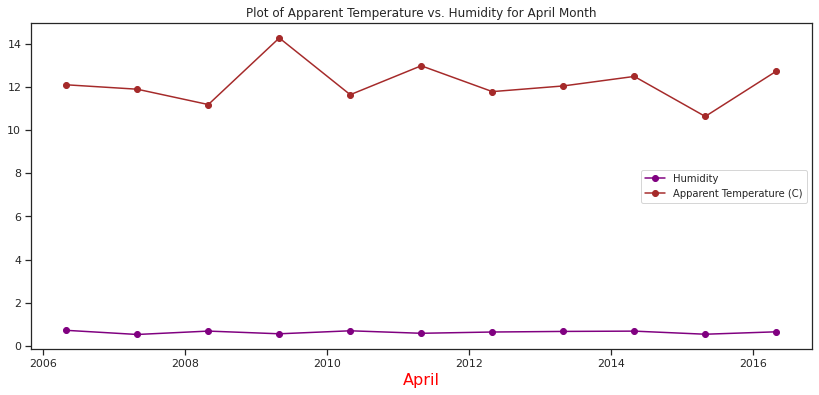

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for April Month')
plt.plot(April['Humidity'], label = 'Humidity', color = 'purple', marker = 'o')
plt.plot(April['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'brown', marker = 'o')
plt.xlabel('April', fontsize = 16, color = 'red')
plt.legend(loc = 5, fontsize = 10)

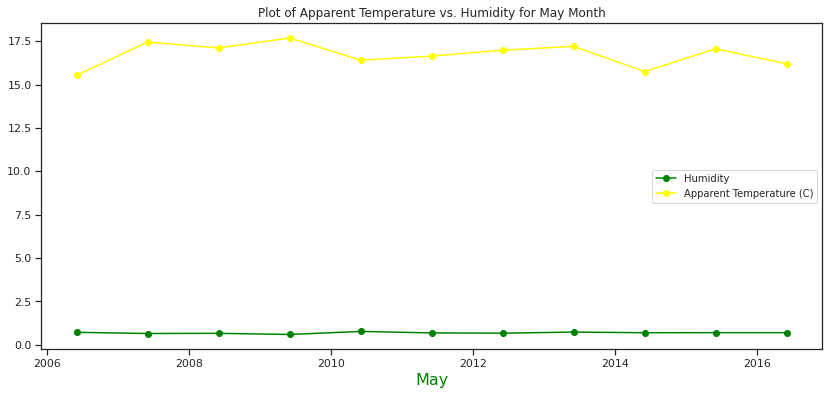

In [23]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for May Month')
plt.plot(May['Humidity'], label = 'Humidity', color = 'green', marker = 'o')
plt.plot(May['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'yellow', marker = 'o')
plt.xlabel('May', fontsize = 16, color = 'green')
plt.legend(loc = 5, fontsize = 10)

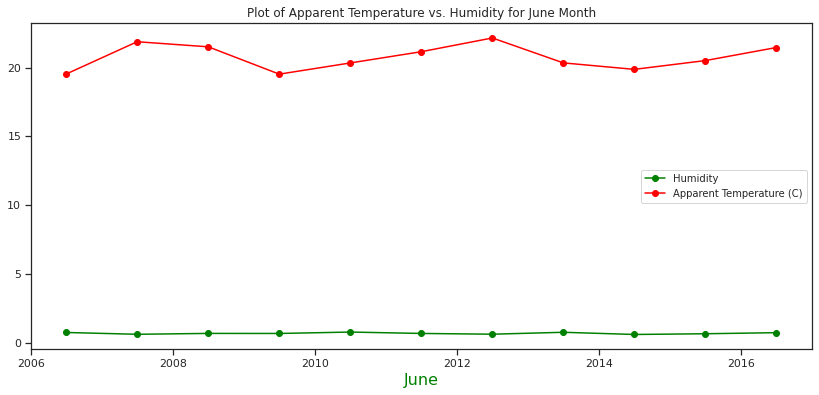

In [24]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for June Month')
plt.plot(June['Humidity'], label = 'Humidity', color = 'green', marker = 'o')
plt.plot(June['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'red', marker = 'o')
plt.xlabel('June', fontsize = 16, color = 'green')
plt.legend(loc = 5, fontsize = 10)

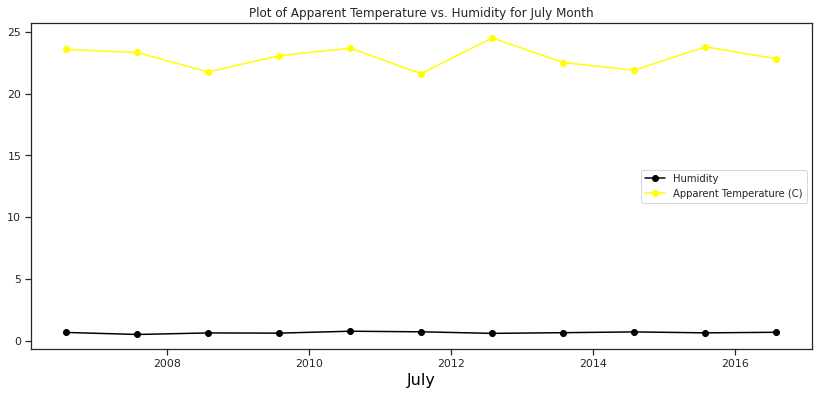

In [26]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for July Month')
plt.plot(July['Humidity'], label = 'Humidity', color = 'black', marker = 'o')
plt.plot(July['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'yellow', marker = 'o')
plt.xlabel('July', fontsize = 16, color = 'black')
plt.legend(loc = 5, fontsize = 10)

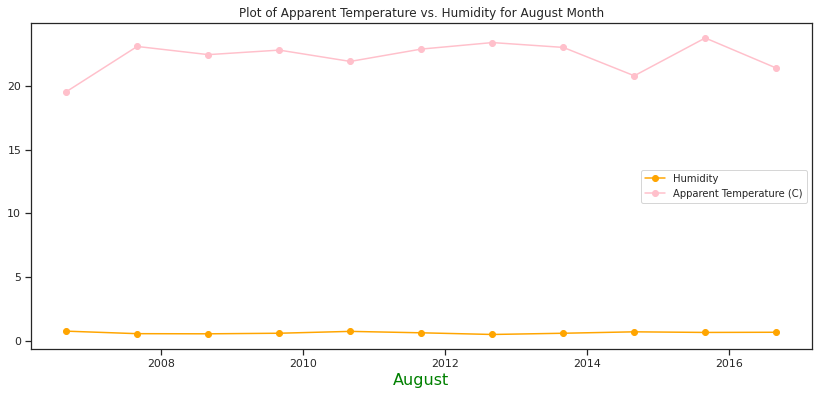

In [27]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for August Month')
plt.plot(August['Humidity'], label = 'Humidity', color = 'orange', marker = 'o')
plt.plot(August['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'pink', marker = 'o')
plt.xlabel('August', fontsize = 16, color = 'green')
plt.legend(loc = 5, fontsize = 10)

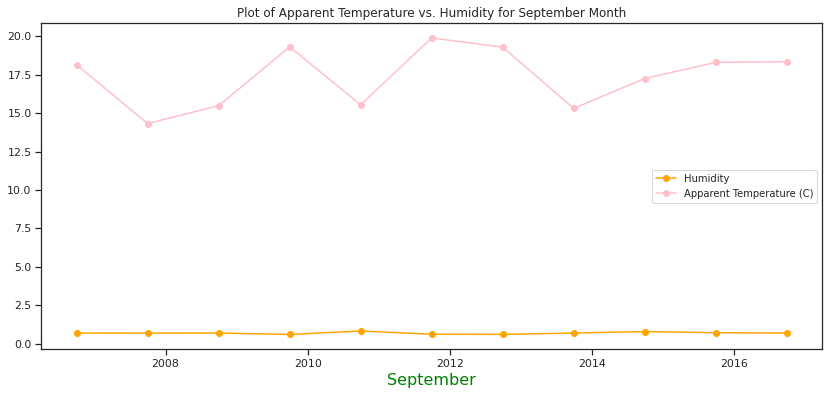

In [28]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for September Month')
plt.plot(September['Humidity'], label = 'Humidity', color = 'orange', marker = 'o')
plt.plot(September['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'pink', marker = 'o')
plt.xlabel('September', fontsize = 16, color = 'green')
plt.legend(loc = 5, fontsize = 10)

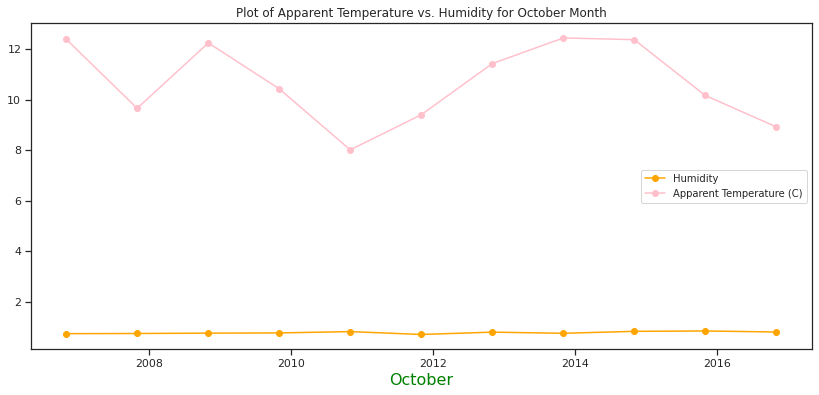

In [29]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for October Month')
plt.plot(October['Humidity'], label = 'Humidity', color = 'orange', marker = 'o')
plt.plot(October['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'pink', marker = 'o')
plt.xlabel('October', fontsize = 16, color = 'green')
plt.legend(loc = 5, fontsize = 10)

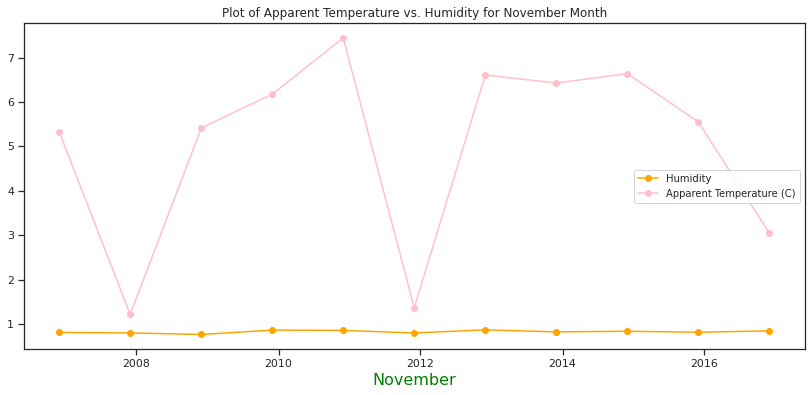

In [30]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for November Month')
plt.plot(November['Humidity'], label = 'Humidity', color = 'orange', marker = 'o')
plt.plot(November['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'pink', marker = 'o')
plt.xlabel('November', fontsize = 16, color = 'green')
plt.legend(loc = 5, fontsize = 10)

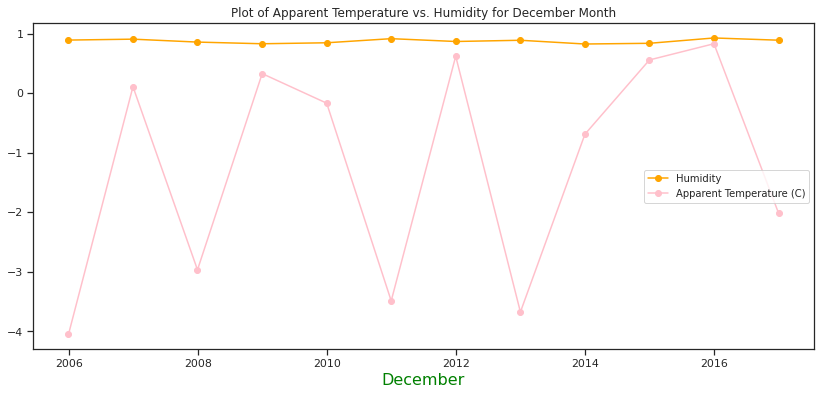

In [31]:
plt.figure(figsize=(14,6))
plt.title('Plot of Apparent Temperature vs. Humidity for December Month')
plt.plot(December['Humidity'], label = 'Humidity', color = 'orange', marker = 'o')
plt.plot(December['Apparent Temperature (C)'], label = 'Apparent Temperature (C)', color = 'pink', marker = 'o')
plt.xlabel('December', fontsize = 16, color = 'green')
plt.legend(loc = 5, fontsize = 10)

After performing Analysis i can see, that Humidity stays constant over the past 10 years, but Apparent Temperature make insane changes, morover there is a positive trend in increasing temperature. That's why i can assume, that the reason for temperature variation may be a global warming problem.

# Thank's for your attention!